In [1]:
# Importing the libs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set() # default configs

%matplotlib inline

In [2]:
# Import the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [4]:
# Checkout dataset
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [5]:
def face_plt(feature, limit = False, xmin = None, xmax = None):
    facet = sns.FacetGrid(train, hue = 'SalePrice', aspect = 4)
    facet.map(sns.kdeplot, feature, shade = True)
    facet.set(xlim = (0, train[feature].max()))
    facet.add_legend()
    if limit is True:
        plt.xlim(xmin,xmax)
    plt.show()

In [6]:
dist_plt = lambda feature,dataset : sns.distplot(train[feature]) if dataset == 0 else sns.distplot(test[feature])

In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# train['MSZoning'].fillna(train.groupby('Neighborhood')['MSZoning'].mode(), inplace = True)

In [9]:
train.groupby('Neighborhood')['MSZoning'].value_counts()

Neighborhood  MSZoning
Blmngtn       RL           16
              RM            1
Blueste       RM            2
BrDale        RM           16
BrkSide       RM           30
              RL           28
ClearCr       RL           28
CollgCr       RL          140
              RM           10
Crawfor       RL           46
              RM            3
              RH            2
Edwards       RL           90
              RM            8
              RH            2
Gilbert       RL           79
IDOTRR        RM           28
              C (all)       9
MeadowV       RM           17
Mitchel       RL           44
              RM            5
NAmes         RL          223
              RH            2
NPkVill       RL            9
NWAmes        RL           73
NoRidge       RL           41
NridgHt       RL           76
              RM            1
OldTown       RM           95
              RL           17
              C (all)       1
SWISU         RL           20
              RH 

In [10]:
train.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [11]:
'''
RL: 0
RM: 1
FV: 2
RH: 3
C (all): 4
'''

'\nRL: 0\nRM: 1\nFV: 2\nRH: 3\nC (all): 4\n'

In [12]:
train_test_data = [train, test]

In [13]:
mszoning_mapping = {'RL': 0, 'RM': 1, 'FV': 2, 'RH': 3, 'C (all)': 4}

for dataset in train_test_data:
    dataset['MSZoning_categories'] = dataset['MSZoning'].map(mszoning_mapping)

In [14]:
test.MSZoning_categories.isnull().sum()

4

In [15]:
# # Taking care of missing data
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0)
# data = test.iloc[:, [test.columns.get_loc('MSZoning_categories')]].values
# test['MSZoning_categories'] = imputer.fit_transform(data)

In [16]:
neighbors = test.loc[pd.isnull(test['MSZoning_categories']), 'Neighborhood'].tolist()
neighbors = set(neighbors)

In [17]:
neighbors = list(neighbors)
print(neighbors)

['Mitchel', 'IDOTRR']


In [18]:
from scipy import stats
modes_arr = test.groupby('Neighborhood')['MSZoning_categories'].apply(lambda x : stats.mode(x)[0][0])[neighbors]
values = list(modes_arr)

dict_ms_zoning = {}
for i in range(len(neighbors)):
    dict_ms_zoning[neighbors[i]] = values[i]

print (dict_ms_zoning)

{'Mitchel': 0.0, 'IDOTRR': 1.0}


In [19]:
# MSZoning filling NaN values 
test.loc[(pd.isnull(test['MSZoning_categories'])) & (test['Neighborhood'] == 'Mitchel'), 'MSZoning_categories'] = dict_ms_zoning['Mitchel']
test.loc[(pd.isnull(test['MSZoning_categories'])) & (test['Neighborhood'] == 'IDOTRR'), 'MSZoning_categories'] = dict_ms_zoning['IDOTRR']

In [20]:
test.MSZoning_categories.isnull().sum()

0

In [21]:
# correlation wrt one feature in acending or decending order as prefferred
corr_df = pd.DataFrame(train.corr()['SalePrice'])
corr_df.sort_values(by = 'SalePrice', ascending = False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [22]:
train['LotFrontage'].fillna(train.groupby(['Neighborhood', 'BldgType'])['LotFrontage'].transform('median'), inplace = True)
test['LotFrontage'].fillna(test.groupby(['Neighborhood', 'BldgType'])['LotFrontage'].transform('median'), inplace = True)

In [23]:
test.LotFrontage.isnull().sum()

1

In [24]:
# Still NaN means, those houses dont have the frontage
train['LotFrontage'].fillna(0, inplace = True)
test['LotFrontage'].fillna(0, inplace = True)

In [25]:
test.LotFrontage.isnull().sum()

0

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Id                     1460 non-null int64
MSSubClass             1460 non-null int64
MSZoning               1460 non-null object
LotFrontage            1460 non-null float64
LotArea                1460 non-null int64
Street                 1460 non-null object
Alley                  91 non-null object
LotShape               1460 non-null object
LandContour            1460 non-null object
Utilities              1460 non-null object
LotConfig              1460 non-null object
LandSlope              1460 non-null object
Neighborhood           1460 non-null object
Condition1             1460 non-null object
Condition2             1460 non-null object
BldgType               1460 non-null object
HouseStyle             1460 non-null object
OverallQual            1460 non-null int64
OverallCond            1460 non-null int64
YearBuilt              1460 non-null int64
YearRemodAdd        

In [27]:
train['Alley'].fillna('NoAlley', inplace = True)
test['Alley'].fillna('NoAlley', inplace = True)

In [28]:
'''
BrkCmn : 0
BrkFace : 1
CBlock: 2
None: 3
Stone: 4
'''

'\nBrkCmn : 0\nBrkFace : 1\nCBlock: 2\nNone: 3\nStone: 4\n'

In [29]:
masvn_mapping = {"BrkCmn" : 0, "BrkFace" : 1, "CBlock": 2, "None": 3, "Stone": 4}
for dataset in train_test_data:
    dataset['MasVnrType_values'] = dataset['MasVnrType'].map(masvn_mapping)

In [30]:
train['MasVnrType_values'].fillna(train.groupby(['Neighborhood', 'BldgType'])['MasVnrType_values'].transform('median'), inplace = True)
test['MasVnrType_values'].fillna(test.groupby(['Neighborhood', 'BldgType'])['MasVnrType_values'].transform('median'), inplace = True)

In [31]:
train['MasVnrArea'].isnull().sum()

8

In [32]:
test['MasVnrArea'].isnull().sum()

15

In [33]:
train['MasVnrArea'].fillna(train.groupby(['Neighborhood', 'BldgType'])['MasVnrArea'].transform('median'), inplace = True)
test['MasVnrArea'].fillna(test.groupby(['Neighborhood', 'BldgType'])['MasVnrArea'].transform('median'), inplace = True)

In [34]:
train['MasVnrArea'].isnull().sum()

0

In [35]:
test['MasVnrArea'].isnull().sum()

0

## Remove rows with min. NaN column values

In [36]:
train['BsmtQual'].fillna('NA', inplace = True)
test['BsmtQual'].fillna('NA', inplace = True)

train['BsmtCond'].fillna('NA', inplace = True)
test['BsmtCond'].fillna('NA', inplace = True)

train['BsmtExposure'].fillna('NA', inplace = True)
test['BsmtExposure'].fillna('NA', inplace = True)

train['BsmtFinType1'].fillna('NA', inplace = True)
test['BsmtFinType1'].fillna('NA', inplace = True)

train['BsmtFinType2'].fillna('NA', inplace = True)
test['BsmtFinType2'].fillna('NA', inplace = True)

train['FireplaceQu'].fillna('NA', inplace = True)

train['GarageType'].fillna('NA', inplace = True)

train['GarageYrBlt'].fillna(0, inplace = True)

train['GarageFinish'].fillna('NA', inplace = True)

train['GarageQual'].fillna('NA', inplace = True)

train['GarageCond'].fillna('NA', inplace = True)

train['PoolQC'].fillna('NA', inplace = True)

train['Fence'].fillna('NA', inplace = True)

train['MiscFeature'].fillna('NA', inplace = True)

In [37]:
# only 1 row is NaN hence filling it with most type of electricals in that type of house - : no explicit queries
train['Electrical'].fillna('SBrkr', inplace = True)

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
Id                     1460 non-null int64
MSSubClass             1460 non-null int64
MSZoning               1460 non-null object
LotFrontage            1460 non-null float64
LotArea                1460 non-null int64
Street                 1460 non-null object
Alley                  1460 non-null object
LotShape               1460 non-null object
LandContour            1460 non-null object
Utilities              1460 non-null object
LotConfig              1460 non-null object
LandSlope              1460 non-null object
Neighborhood           1460 non-null object
Condition1             1460 non-null object
Condition2             1460 non-null object
BldgType               1460 non-null object
HouseStyle             1460 non-null object
OverallQual            1460 non-null int64
OverallCond            1460 non-null int64
YearBuilt              1460 non-null int64
YearRemodAdd      

In [39]:
test['Utilities'].fillna('AllPub', inplace = True)

In [40]:
test['Exterior2nd'].value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
Stone        1
AsphShn      1
Name: Exterior2nd, dtype: int64

In [41]:
exterior_mapping = {"AsbShng": 0, "AsphShn": 1, "BrkComm": 2, "BrkFace": 3, "CBlock": 4, "CemntBd": 5, "HdBoard": 6, "ImStucc": 7, "MetalSd": 8, "Other": 9, "Plywood": 10, "PreCast": 11, "Stone": 12, "Stucco": 13, "VinylSd": 14, "Wd Sdng": 15, "WdShing": 16}
for dataset in train_test_data:
    dataset['Exterior1st_values'] = dataset['Exterior1st'].map(exterior_mapping)

In [42]:
exterior_mapping = {"AsbShng": 0, "AsphShn": 1, "Brk Cmn": 2, "BrkFace": 3, "CBlock": 4, "CmentBd": 5, "HdBoard": 6, "ImStucc": 7, "MetalSd": 8, "Other": 9, "Plywood": 10, "PreCast": 11, "Stone": 12, "Stucco": 13, "VinylSd": 14, "Wd Sdng": 15, "Wd Shng": 16}
for dataset in train_test_data:
    dataset['Exterior2nd_values'] = dataset['Exterior2nd'].map(exterior_mapping)

In [43]:
test['Exterior1st_values'].fillna(test.groupby(['Neighborhood', 'BldgType'])['Exterior1st_values'].transform('median'), inplace = True)
test['Exterior2nd_values'].fillna(test.groupby(['Neighborhood', 'BldgType'])['Exterior2nd_values'].transform('median'), inplace = True)

In [44]:
test['Exterior2nd_values'].unique().size

16

In [45]:
test['BsmtFinSF1'].fillna(test.groupby(['Neighborhood', 'BldgType'])['BsmtFinSF1'].transform('median'), inplace = True)
test['BsmtFinSF2'].fillna(test.groupby(['Neighborhood', 'BldgType'])['BsmtFinSF2'].transform('median'), inplace = True)
test['BsmtUnfSF'].fillna(test.groupby(['Neighborhood', 'BldgType'])['BsmtUnfSF'].transform('median'), inplace = True)
test['TotalBsmtSF'].fillna(test.groupby(['Neighborhood', 'BldgType'])['TotalBsmtSF'].transform('median'), inplace = True)
test['BsmtFullBath'].fillna(test.groupby(['Neighborhood', 'BldgType'])['BsmtFullBath'].transform('median'), inplace = True)
test['BsmtHalfBath'].fillna(test.groupby(['Neighborhood', 'BldgType'])['BsmtHalfBath'].transform('median'), inplace = True)

In [46]:
kitchen_mapping = {"EX": 0, "Gd": 1, "Td": 2, "TA": 3, "Fa": 4, "Po": 5}
for dataset in train_test_data:
    dataset['KitchenQual_values'] = dataset['KitchenQual'].map(kitchen_mapping)

In [47]:
test['KitchenQual_values'].fillna(test.groupby(['Neighborhood', 'BldgType'])['KitchenQual_values'].transform('median'), inplace = True)

In [48]:
functional_mapping = { "Typ": 0, "Min1": 1, "Min2": 2, "Mod": 3, "Maj1": 4, "Maj2": 5, "Sev": 6, "Sal": 7}
for dataset in train_test_data:
    dataset['Functional_values'] = dataset['Functional'].map(functional_mapping)

In [49]:
test['Functional_values'].fillna(test.groupby(['Neighborhood', 'BldgType'])['Functional_values'].transform('median'), inplace = True)

In [50]:
test['FireplaceQu'].fillna('NA', inplace = True)
test['GarageType'].fillna('NA', inplace = True)
test['GarageYrBlt'].fillna(0, inplace = True)
test['GarageArea'].fillna(0, inplace = True)
test['GarageCars'].fillna(0, inplace = True)
test['GarageFinish'].fillna('NA', inplace = True)
test['GarageCond'].fillna('NA', inplace = True)
test['GarageQual'].fillna('NA', inplace = True)
test['PoolQC'].fillna('NA', inplace = True)
test['MiscFeature'].fillna('NA', inplace = True)
test['Fence'].fillna('NA', inplace = True)

In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 86 columns):
Id                     1459 non-null int64
MSSubClass             1459 non-null int64
MSZoning               1455 non-null object
LotFrontage            1459 non-null float64
LotArea                1459 non-null int64
Street                 1459 non-null object
Alley                  1459 non-null object
LotShape               1459 non-null object
LandContour            1459 non-null object
Utilities              1459 non-null object
LotConfig              1459 non-null object
LandSlope              1459 non-null object
Neighborhood           1459 non-null object
Condition1             1459 non-null object
Condition2             1459 non-null object
BldgType               1459 non-null object
HouseStyle             1459 non-null object
OverallQual            1459 non-null int64
OverallCond            1459 non-null int64
YearBuilt              1459 non-null int64
YearRemodAdd      

In [52]:
# Only one value missing, so did the manual analysis - below
test['SaleType'].fillna('WD', inplace = True)

In [53]:
test.groupby(['Neighborhood', 'BldgType'])['SaleType'].value_counts()

Neighborhood  BldgType  SaleType
Blmngtn       1Fam      New          2
              TwnhsE    WD           7
                        New          2
Blueste       Twnhs     WD           4
              TwnhsE    WD           4
BrDale        Twnhs     WD          11
                        COD          1
              TwnhsE    WD           2
BrkSide       1Fam      WD          45
                        COD          1
                        CWD          1
                        ConLD        1
                        ConLI        1
                        ConLw        1
ClearCr       1Fam      WD          13
                        COD          2
              Twnhs     WD           1
CollgCr       1Fam      WD          98
                        New         14
                        Con          1
              Duplex    WD           1
              TwnhsE    WD           3
Crawfor       1Fam      WD          40
                        CWD          2
              2fmCon    WD     

In [54]:
test[pd.isnull(test['SaleType'])][['Neighborhood', 'BldgType']]

,Neighborhood,BldgType


In [55]:
'''
MSZoning_categories    1459 non-null float64
MasVnrType_values      1459 non-null float64
Exterior1st_values     1459 non-null float64
Exterior2nd_values     1459 non-null float64
KitchenQual_values     1459 non-null float64
Functional_values 
'''

'\nMSZoning_categories    1459 non-null float64\nMasVnrType_values      1459 non-null float64\nExterior1st_values     1459 non-null float64\nExterior2nd_values     1459 non-null float64\nKitchenQual_values     1459 non-null float64\nFunctional_values \n'

In [56]:
test.drop(['MSZoning', 'MasVnrType', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional'], axis = 1, inplace = True)
train.drop(['MSZoning', 'MasVnrType', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional'], axis = 1, inplace = True)

# DANGAL

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id                     1460 non-null int64
MSSubClass             1460 non-null int64
LotFrontage            1460 non-null float64
LotArea                1460 non-null int64
Street                 1460 non-null object
Alley                  1460 non-null object
LotShape               1460 non-null object
LandContour            1460 non-null object
Utilities              1460 non-null object
LotConfig              1460 non-null object
LandSlope              1460 non-null object
Neighborhood           1460 non-null object
Condition1             1460 non-null object
Condition2             1460 non-null object
BldgType               1460 non-null object
HouseStyle             1460 non-null object
OverallQual            1460 non-null int64
OverallCond            1460 non-null int64
YearBuilt              1460 non-null int64
YearRemodAdd           1460 non-null int64
RoofStyle          

In [58]:
train = train.drop('Id', axis = 1).copy()
df_ids = test['Id']
test = test.drop('Id', axis = 1).copy()

# Model stuff below

In [59]:
X = train.drop('SalePrice', axis = 1).copy()
y = train['SalePrice']

In [60]:
features_to_be_endcoded = [key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object']] 
features_to_be_endcoded.extend(['MSZoning_categories', 'MasVnrType_values', 'Exterior1st_values', 'Exterior2nd_values', 'KitchenQual_values', 'Functional_values'])
train_objs_num = len(X)
dataset = pd.concat(objs=[X, test], axis=0)
dataset = pd.get_dummies(dataset, columns = features_to_be_endcoded, prefix = features_to_be_endcoded, drop_first= True)
train = pd.DataFrame.copy(dataset[:train_objs_num])
test = pd.DataFrame.copy(dataset[train_objs_num:])

In [61]:
print(train.shape)
print(test.shape)

(1460, 260)
(1459, 260)


In [62]:
new_df = pd.concat(objs = [train, y], axis = 1)

In [63]:
corr_df = pd.DataFrame(new_df.corr()['SalePrice'])
corr_df.sort_values(by = 'SalePrice', ascending= False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [64]:
threshold = 0.30
df  = corr_df['SalePrice'].gt(threshold, 0)

In [65]:
columns = []
dict(df)
for k,v in df.items():
    if v:
        columns.append(k)

columns.remove('SalePrice')

In [66]:
train = train[columns]
test = test[columns]

In [67]:
# Splitting the dataset into the Training set and Test set
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.2, random_state = 0)

### Adj R - square

In [68]:
from statsmodels.tools.tools import add_constant
import statsmodels.formula.api as sm
# added x0 values with 1's
train = add_constant(data = train)

In [69]:
# First model
train_opt = train.iloc[:,:]
regressor_OLS = sm.OLS(endog = y, exog = train_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     216.0
Date:                Mon, 05 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:44:23   Log-Likelihood:                -17295.
No. Observations:                1460   AIC:                         3.465e+04
Df Residuals:                    1429   BIC:                         3.482e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -7.953e+05   1.46e+05     -5.457      0.000   -1.08e+06   -5.09e+05
LotFrontage                41.7671     46.601      0.896      0.370     -49.646     133.180
OverallQual              1.603e+04   1178.411     13.604      0.000    1.37e+04    1.83e+04
YearBuilt                 103.5590     53.507      1.935      0.053      -1.402     208.520
YearRemodAdd              274.8571     61.397      4.477      0.000     154.419     395.295
MasVnrArea                  9.7907      6.105      1.604      0.109      -2.184      21.766
BsmtFinSF1                 13.7214      2.870      4.781      0.000       8.091      19.352
TotalBsmtSF                 7.1097      4.114      1.728      0.084      -0.961      15.181
1stFlrSF                   23.3449     19.677      1.186      0.236     -15.253      61.943
2ndFlrSF                   16.6457     19.302      0.862      0.389     -21.218      54.510
GrLivArea                  20.3832     19.224      1.060      0.289     -17.328      58.094
FullBath                 -457.8574   2492.256     -0.184      0.854   -5346.729    4431.014
TotRmsAbvGrd             1689.7253   1061.538      1.592      0.112    -392.614    3772.065
Fireplaces               7203.5557   1886.295      3.819      0.000    3503.351    1.09e+04
GarageCars               9820.4118   2799.461      3.508      0.000    4328.918    1.53e+04
GarageArea                  4.9178      9.594      0.513      0.608     -13.902      23.737
WoodDeckSF                 27.9738      7.735      3.616      0.000      12.800      43.147
OpenPorchSF                 8.7946     14.775      0.595      0.552     -20.188      37.778
Neighborhood_NoRidge     4.966e+04   6281.613      7.906      0.000    3.73e+04     6.2e+04
Neighborhood_NridgHt     3.591e+04   4783.433      7.508      0.000    2.65e+04    4.53e+04
ExterQual_Gd            -1338.5975   2717.280     -0.493      0.622   -6668.882    3991.687
Foundation_PConc         1552.5982   2880.304      0.539      0.590   -4097.479    7202.676
BsmtExposure_Gd           2.32e+04   3412.747      6.798      0.000    1.65e+04    2.99e+04
BsmtFinType1_GLQ         4889.4551   2750.665      1.778      0.076    -506.320    1.03e+04
FireplaceQu_Gd           3199.2223   2604.730      1.228      0.220   -1910.282    8308.726
GarageType_Attchd        -210.7126   2260.724     -0.093      0.926   -4645.407    4223.981
SaleType_New             2.945e+04   2.01e+04      1.466      0.143   -9943.367    6.88e+04
SaleCondition_Partial   -6104.8389   1.98e+04     -0.308      0.758    -4.5e+04    3.28e+04
MasVnrType_values_4.0    1042.4174   3726.303      0.280      0.780   -6267.193    8352.028
Exterior1st_values_14.0 -6980.3209   9098.777     -0.767      0.443   -2.48e+04    1.09e+04
Exterior2nd_values_14.0  7490.5208   9102.685  

In [70]:
train_opt =  train_opt.drop('GarageType_Attchd', axis = 1)
regressor_OLS = sm.OLS(endog = y, exog = train_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     223.6
Date:                Mon, 05 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:44:23   Log-Likelihood:                -17295.
No. Observations:                1460   AIC:                         3.465e+04
Df Residuals:                    1430   BIC:                         3.481e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -7.931e+05   1.44e+05     -5.516      0.000   -1.08e+06   -5.11e+05
LotFrontage                41.1674     46.138      0.892      0.372     -49.339     131.674
OverallQual              1.602e+04   1171.717     13.672      0.000    1.37e+04    1.83e+04
YearBuilt                 102.3738     51.956      1.970      0.049       0.455     204.292
YearRemodAdd              274.9415     61.369      4.480      0.000     154.558     395.324
MasVnrArea                  9.7996      6.102      1.606      0.108      -2.170      21.769
BsmtFinSF1                 13.7073      2.865      4.784      0.000       8.087      19.328
TotalBsmtSF                 7.0974      4.111      1.726      0.084      -0.967      15.161
1stFlrSF                   23.2186     19.623      1.183      0.237     -15.275      61.712
2ndFlrSF                   16.5720     19.279      0.860      0.390     -21.247      54.391
GrLivArea                  20.5083     19.171      1.070      0.285     -17.097      58.114
FullBath                 -464.2440   2490.450     -0.186      0.852   -5349.571    4421.083
TotRmsAbvGrd             1689.5420   1061.168      1.592      0.112    -392.070    3771.154
Fireplaces               7179.5569   1867.991      3.843      0.000    3515.259    1.08e+04
GarageCars               9809.8615   2796.202      3.508      0.000    4324.764    1.53e+04
GarageArea                  4.9552      9.582      0.517      0.605     -13.841      23.752
WoodDeckSF                 27.9134      7.705      3.623      0.000      12.799      43.028
OpenPorchSF                 8.7924     14.770      0.595      0.552     -20.180      37.765
Neighborhood_NoRidge     4.967e+04   6279.352      7.910      0.000    3.73e+04     6.2e+04
Neighborhood_NridgHt     3.595e+04   4763.548      7.547      0.000    2.66e+04    4.53e+04
ExterQual_Gd            -1351.0068   2713.075     -0.498      0.619   -6673.041    3971.027
Foundation_PConc         1563.2098   2877.055      0.543      0.587   -4080.492    7206.911
BsmtExposure_Gd          2.321e+04   3407.721      6.812      0.000    1.65e+04    2.99e+04
BsmtFinType1_GLQ         4889.8512   2749.708      1.778      0.076    -504.044    1.03e+04
FireplaceQu_Gd           3214.0134   2598.990      1.237      0.216   -1884.228    8312.255
SaleType_New             2.947e+04   2.01e+04      1.468      0.142   -9909.797    6.88e+04
SaleCondition_Partial   -6109.3591   1.98e+04     -0.308      0.758    -4.5e+04    3.28e+04
MasVnrType_values_4.0    1061.4423   3719.418      0.285      0.775   -6234.659    8357.544
Exterior1st_values_14.0 -6998.3601   9093.565     -0.770      0.442   -2.48e+04    1.08e+04
Exterior2nd_values_14.0  7508.1504   9097.564      0.825      0.409   -1.03e+04    2.54e+04
===============================================

In [71]:
train_opt =  train_opt.drop('FullBath', axis = 1)
regressor_OLS = sm.OLS(endog = y, exog = train_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     231.8
Date:                Mon, 05 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:44:23   Log-Likelihood:                -17295.
No. Observations:                1460   AIC:                         3.465e+04
Df Residuals:                    1431   BIC:                         3.480e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -7.873e+05    1.4e+05     -5.608      0.000   -1.06e+06   -5.12e+05
LotFrontage                41.6543     46.049      0.905      0.366     -48.676     131.985
OverallQual              1.601e+04   1171.056     13.676      0.000    1.37e+04    1.83e+04
YearBuilt                 100.0255     50.389      1.985      0.047       1.182     198.870
YearRemodAdd              274.2544     61.238      4.479      0.000     154.129     394.380
MasVnrArea                  9.8229      6.098      1.611      0.107      -2.140      21.786
BsmtFinSF1                 13.7741      2.842      4.847      0.000       8.200      19.349
TotalBsmtSF                 7.1393      4.103      1.740      0.082      -0.910      15.188
1stFlrSF                   23.0017     19.582      1.175      0.240     -15.411      61.414
2ndFlrSF                   16.4271     19.257      0.853      0.394     -21.348      54.203
GrLivArea                  20.4304     19.160      1.066      0.286     -17.154      58.014
TotRmsAbvGrd             1667.2587   1054.058      1.582      0.114    -400.405    3734.922
Fireplaces               7189.2642   1866.636      3.851      0.000    3527.629    1.09e+04
GarageCars               9769.4520   2786.846      3.506      0.000    4302.710    1.52e+04
GarageArea                  5.0915      9.551      0.533      0.594     -13.644      23.827
WoodDeckSF                 27.9411      7.701      3.628      0.000      12.834      43.048
OpenPorchSF                 8.7584     14.764      0.593      0.553     -20.202      37.719
Neighborhood_NoRidge     4.976e+04   6256.408      7.954      0.000    3.75e+04     6.2e+04
Neighborhood_NridgHt     3.594e+04   4761.686      7.548      0.000    2.66e+04    4.53e+04
ExterQual_Gd            -1378.6061   2708.118     -0.509      0.611   -6690.914    3933.701
Foundation_PConc         1527.2803   2869.623      0.532      0.595   -4101.839    7156.400
BsmtExposure_Gd          2.322e+04   3406.549      6.815      0.000    1.65e+04    2.99e+04
BsmtFinType1_GLQ         4878.6337   2748.123      1.775      0.076    -512.147    1.03e+04
FireplaceQu_Gd           3257.3359   2587.705      1.259      0.208   -1818.765    8333.437
SaleType_New             2.943e+04   2.01e+04      1.467      0.143   -9927.342    6.88e+04
SaleCondition_Partial   -6077.9298   1.98e+04     -0.307      0.759    -4.5e+04    3.28e+04
MasVnrType_values_4.0    1047.9938   3717.464      0.282      0.778   -6244.270    8340.258
Exterior1st_values_14.0 -7063.6252   9083.757     -0.778      0.437   -2.49e+04    1.08e+04
Exterior2nd_values_14.0  7581.8679   9085.899      0.834      0.404   -1.02e+04    2.54e+04
==============================================================================
Omnibus:                      712.425   Durbin-Watson:      

In [72]:
train_opt =  train_opt.drop('MasVnrType_values_4.0', axis = 1)
regressor_OLS = sm.OLS(endog = y, exog = train_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     240.5
Date:                Mon, 05 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:44:23   Log-Likelihood:                -17295.
No. Observations:                1460   AIC:                         3.465e+04
Df Residuals:                    1432   BIC:                         3.479e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -7.883e+05    1.4e+05     -5.619      0.000   -1.06e+06   -5.13e+05
LotFrontage                41.0443     45.983      0.893      0.372     -49.157     131.246
OverallQual              1.603e+04   1168.877     13.717      0.000    1.37e+04    1.83e+04
YearBuilt                  99.9939     50.373      1.985      0.047       1.182     198.806
YearRemodAdd              274.6820     61.199      4.488      0.000     154.632     394.732
MasVnrArea                  9.9638      6.076      1.640      0.101      -1.955      21.883
BsmtFinSF1                 13.8549      2.826      4.902      0.000       8.311      19.399
TotalBsmtSF                 7.1421      4.102      1.741      0.082      -0.904      15.189
1stFlrSF                   23.0012     19.576      1.175      0.240     -15.399      61.401
2ndFlrSF                   16.3557     19.249      0.850      0.396     -21.404      54.116
GrLivArea                  20.3947     19.153      1.065      0.287     -17.176      57.966
TotRmsAbvGrd             1689.2234   1050.836      1.608      0.108    -372.120    3750.567
Fireplaces               7169.3913   1864.704      3.845      0.000    3511.546    1.08e+04
GarageCars               9784.1217   2785.465      3.513      0.000    4320.093    1.52e+04
GarageArea                  5.1198      9.547      0.536      0.592     -13.609      23.848
WoodDeckSF                 27.9022      7.697      3.625      0.000      12.803      43.002
OpenPorchSF                 8.8650     14.754      0.601      0.548     -20.077      37.807
Neighborhood_NoRidge     4.961e+04   6232.241      7.961      0.000    3.74e+04    6.18e+04
Neighborhood_NridgHt     3.617e+04   4689.536      7.714      0.000     2.7e+04    4.54e+04
ExterQual_Gd            -1339.3699   2703.670     -0.495      0.620   -6642.948    3964.209
Foundation_PConc         1527.1596   2868.701      0.532      0.595   -4100.147    7154.466
BsmtExposure_Gd          2.323e+04   3405.124      6.822      0.000    1.65e+04    2.99e+04
BsmtFinType1_GLQ         4861.7660   2746.588      1.770      0.077    -526.001    1.02e+04
FireplaceQu_Gd           3331.2429   2573.563      1.294      0.196   -1717.114    8379.600
SaleType_New             2.934e+04   2.01e+04      1.463      0.144      -1e+04    6.87e+04
SaleCondition_Partial   -5825.3854   1.98e+04     -0.294      0.769   -4.46e+04     3.3e+04
Exterior1st_values_14.0 -6757.8325   9015.861     -0.750      0.454   -2.44e+04    1.09e+04
Exterior2nd_values_14.0  7306.8869   9030.485      0.809      0.419   -1.04e+04     2.5e+04
==============================================================================
Omnibus:                      709.001   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           10251

In [73]:
train_opt =  train_opt.drop('SaleCondition_Partial', axis = 1)
regressor_OLS = sm.OLS(endog = y, exog = train_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     249.9
Date:                Mon, 05 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:44:24   Log-Likelihood:                -17295.
No. Observations:                1460   AIC:                         3.464e+04
Df Residuals:                    1433   BIC:                         3.479e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -7.879e+05    1.4e+05     -5.618      0.000   -1.06e+06   -5.13e+05
LotFrontage                41.2130     45.965      0.897      0.370     -48.953     131.379
OverallQual              1.603e+04   1168.503     13.721      0.000    1.37e+04    1.83e+04
YearBuilt                  99.9341     50.356      1.985      0.047       1.155     198.714
YearRemodAdd              274.5317     61.178      4.487      0.000     154.525     394.539
MasVnrArea                  9.9846      6.074      1.644      0.100      -1.930      21.899
BsmtFinSF1                 13.8700      2.825      4.910      0.000       8.328      19.412
TotalBsmtSF                 7.1159      4.100      1.736      0.083      -0.926      15.158
1stFlrSF                   22.9974     19.569      1.175      0.240     -15.390      61.385
2ndFlrSF                   16.3569     19.243      0.850      0.395     -21.391      54.105
GrLivArea                  20.4032     19.147      1.066      0.287     -17.156      57.962
TotRmsAbvGrd             1690.5986   1050.491      1.609      0.108    -370.066    3751.263
Fireplaces               7163.8083   1864.014      3.843      0.000    3507.320    1.08e+04
GarageCars               9807.6370   2783.431      3.524      0.000    4347.600    1.53e+04
GarageArea                  5.0269      9.539      0.527      0.598     -13.685      23.739
WoodDeckSF                 27.9950      7.689      3.641      0.000      12.913      43.077
OpenPorchSF                 8.9405     14.747      0.606      0.544     -19.988      37.869
Neighborhood_NoRidge     4.961e+04   6230.224      7.963      0.000    3.74e+04    6.18e+04
Neighborhood_NridgHt     3.619e+04   4687.560      7.721      0.000     2.7e+04    4.54e+04
ExterQual_Gd            -1335.3131   2702.773     -0.494      0.621   -6637.129    3966.503
Foundation_PConc         1547.0805   2866.988      0.540      0.590   -4076.863    7171.024
BsmtExposure_Gd          2.319e+04   3401.224      6.818      0.000    1.65e+04    2.99e+04
BsmtFinType1_GLQ         4857.2678   2745.670      1.769      0.077    -528.696    1.02e+04
FireplaceQu_Gd           3324.3942   2572.637      1.292      0.196   -1722.145    8370.933
SaleType_New             2.354e+04   3738.640      6.296      0.000    1.62e+04    3.09e+04
Exterior1st_values_14.0 -6766.5979   9012.938     -0.751      0.453   -2.44e+04    1.09e+04
Exterior2nd_values_14.0  7284.2427   9027.280      0.807      0.420   -1.04e+04     2.5e+04
==============================================================================
Omnibus:                      708.976   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           102440.417
Skew:                          -1.204   Prob(JB):                         0.00
Kurtosi

In [74]:
train_opt =  train_opt.drop('ExterQual_Gd', axis = 1)
regressor_OLS = sm.OLS(endog = y, exog = train_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     260.0
Date:                Mon, 05 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:44:24   Log-Likelihood:                -17295.
No. Observations:                1460   AIC:                         3.464e+04
Df Residuals:                    1434   BIC:                         3.478e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -7.721e+05   1.37e+05     -5.656      0.000   -1.04e+06   -5.04e+05
LotFrontage                42.0925     45.918      0.917      0.359     -47.982     132.167
OverallQual              1.594e+04   1154.003     13.816      0.000    1.37e+04    1.82e+04
YearBuilt                  95.9622     49.697      1.931      0.054      -1.525     193.449
YearRemodAdd              270.6122     60.645      4.462      0.000     151.650     389.574
MasVnrArea                 10.3634      6.023      1.721      0.086      -1.452      22.179
BsmtFinSF1                 14.0214      2.808      4.994      0.000       8.514      19.529
TotalBsmtSF                 7.0361      4.095      1.718      0.086      -0.998      15.070
1stFlrSF                   23.3683     19.550      1.195      0.232     -14.981      61.718
2ndFlrSF                   16.6810     19.227      0.868      0.386     -21.035      54.397
GrLivArea                  19.8646     19.111      1.039      0.299     -17.624      57.353
TotRmsAbvGrd             1750.2199   1043.261      1.678      0.094    -296.262    3796.701
Fireplaces               7170.1746   1863.478      3.848      0.000    3514.740    1.08e+04
GarageCars               9768.5369   2781.572      3.512      0.000    4312.150    1.52e+04
GarageArea                  4.9913      9.536      0.523      0.601     -13.715      23.698
WoodDeckSF                 27.9904      7.687      3.641      0.000      12.912      43.068
OpenPorchSF                 8.9273     14.743      0.606      0.545     -19.993      37.848
Neighborhood_NoRidge     4.924e+04   6182.738      7.963      0.000    3.71e+04    6.14e+04
Neighborhood_NridgHt     3.641e+04   4666.244      7.802      0.000    2.73e+04    4.56e+04
Foundation_PConc         1360.5238   2841.264      0.479      0.632   -4212.955    6934.002
BsmtExposure_Gd          2.332e+04   3389.867      6.879      0.000    1.67e+04       3e+04
BsmtFinType1_GLQ         4740.2945   2734.722      1.733      0.083    -624.189    1.01e+04
FireplaceQu_Gd           3225.0945   2564.098      1.258      0.209   -1804.690    8254.879
SaleType_New              2.36e+04   3735.630      6.317      0.000    1.63e+04    3.09e+04
Exterior1st_values_14.0 -6937.3681   9003.934     -0.770      0.441   -2.46e+04    1.07e+04
Exterior2nd_values_14.0  7287.9363   9024.897      0.808      0.419   -1.04e+04     2.5e+04
==============================================================================
Omnibus:                      702.488   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           101647.174
Skew:                          -1.182   Prob(JB):                         0.00
Kurtosis:                      43.808   Cond. No.                     5.60e+05
====================

In [75]:
train_opt =  train_opt.drop('Foundation_PConc', axis = 1)
regressor_OLS = sm.OLS(endog = y, exog = train_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     271.0
Date:                Mon, 05 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:44:24   Log-Likelihood:                -17295.
No. Observations:                1460   AIC:                         3.464e+04
Df Residuals:                    1435   BIC:                         3.477e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -7.912e+05   1.31e+05     -6.061      0.000   -1.05e+06   -5.35e+05
LotFrontage                39.6922     45.632      0.870      0.385     -49.820     129.204
OverallQual              1.601e+04   1145.284     13.979      0.000    1.38e+04    1.83e+04
YearBuilt                 102.8089     47.583      2.161      0.031       9.469     196.149
YearRemodAdd              273.4747     60.333      4.533      0.000     155.124     391.826
MasVnrArea                 10.0123      5.977      1.675      0.094      -1.712      21.737
BsmtFinSF1                 13.8647      2.788      4.974      0.000       8.396      19.333
TotalBsmtSF                 7.2100      4.078      1.768      0.077      -0.790      15.210
1stFlrSF                   22.9271     19.523      1.174      0.240     -15.369      61.224
2ndFlrSF                   16.4477     19.216      0.856      0.392     -21.246      54.142
GrLivArea                  20.3022     19.084      1.064      0.288     -17.133      57.737
TotRmsAbvGrd             1731.4853   1042.247      1.661      0.097    -313.006    3775.977
Fireplaces               7103.4900   1857.768      3.824      0.000    3459.259    1.07e+04
GarageCars               9844.1343   2776.343      3.546      0.000    4398.009    1.53e+04
GarageArea                  4.8303      9.528      0.507      0.612     -13.860      23.520
WoodDeckSF                 28.0195      7.684      3.646      0.000      12.946      43.093
OpenPorchSF                 9.1852     14.729      0.624      0.533     -19.708      38.079
Neighborhood_NoRidge     4.953e+04   6151.058      8.052      0.000    3.75e+04    6.16e+04
Neighborhood_NridgHt      3.65e+04   4661.190      7.830      0.000    2.74e+04    4.56e+04
BsmtExposure_Gd          2.333e+04   3388.820      6.886      0.000    1.67e+04       3e+04
BsmtFinType1_GLQ         4980.2503   2687.695      1.853      0.064    -291.982    1.03e+04
FireplaceQu_Gd           3312.5828   2556.893      1.296      0.195   -1703.066    8328.232
SaleType_New             2.372e+04   3726.559      6.364      0.000    1.64e+04     3.1e+04
Exterior1st_values_14.0 -6845.2137   8999.459     -0.761      0.447   -2.45e+04    1.08e+04
Exterior2nd_values_14.0  7498.4643   9011.760      0.832      0.406   -1.02e+04    2.52e+04
==============================================================================
Omnibus:                      698.803   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           100562.401
Skew:                          -1.171   Prob(JB):                         0.00
Kurtosis:                      43.591   Cond. No.                     5.36e+05
==============================================================================

Warnings:
[1] Standard Errors as

In [76]:
train_opt =  train_opt.drop('GarageArea', axis = 1)
regressor_OLS = sm.OLS(endog = y, exog = train_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     282.9
Date:                Mon, 05 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:44:24   Log-Likelihood:                -17295.
No. Observations:                1460   AIC:                         3.464e+04
Df Residuals:                    1436   BIC:                         3.477e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -7.876e+05    1.3e+05     -6.044      0.000   -1.04e+06   -5.32e+05
LotFrontage                42.5540     45.270      0.940      0.347     -46.248     131.356
OverallQual              1.601e+04   1144.986     13.983      0.000    1.38e+04    1.83e+04
YearBuilt                 101.9224     47.539      2.144      0.032       8.670     195.175
YearRemodAdd              272.4815     60.286      4.520      0.000     154.224     390.740
MasVnrArea                 10.1384      5.970      1.698      0.090      -1.573      21.850
BsmtFinSF1                 14.0321      2.767      5.071      0.000       8.604      19.461
TotalBsmtSF                 7.2571      4.076      1.780      0.075      -0.739      15.253
1stFlrSF                   22.9094     19.518      1.174      0.241     -15.377      61.196
2ndFlrSF                   16.2908     19.208      0.848      0.397     -21.388      53.970
GrLivArea                  20.6345     19.068      1.082      0.279     -16.769      58.038
TotRmsAbvGrd             1679.1546   1036.855      1.619      0.106    -354.758    3713.067
Fireplaces               7014.7059   1849.016      3.794      0.000    3387.644    1.06e+04
GarageCars               1.098e+04   1652.047      6.643      0.000    7734.497    1.42e+04
WoodDeckSF                 28.1399      7.679      3.665      0.000      13.077      43.202
OpenPorchSF                 9.6901     14.692      0.660      0.510     -19.130      38.510
Neighborhood_NoRidge     4.943e+04   6146.647      8.042      0.000    3.74e+04    6.15e+04
Neighborhood_NridgHt     3.667e+04   4647.299      7.891      0.000    2.76e+04    4.58e+04
BsmtExposure_Gd          2.325e+04   3384.026      6.871      0.000    1.66e+04    2.99e+04
BsmtFinType1_GLQ         4946.9295   2686.196      1.842      0.066    -322.360    1.02e+04
FireplaceQu_Gd           3279.7858   2555.413      1.283      0.200   -1732.957    8292.529
SaleType_New             2.384e+04   3717.415      6.413      0.000    1.65e+04    3.11e+04
Exterior1st_values_14.0 -6985.8284   8992.856     -0.777      0.437   -2.46e+04    1.07e+04
Exterior2nd_values_14.0  7655.5044   9004.105      0.850      0.395      -1e+04    2.53e+04
==============================================================================
Omnibus:                      694.189   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98778.229
Skew:                          -1.159   Prob(JB):                         0.00
Kurtosis:                      43.229   Cond. No.                     5.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition numb

In [77]:
train_opt =  train_opt.drop('OpenPorchSF', axis = 1)
regressor_OLS = sm.OLS(endog = y, exog = train_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     295.9
Date:                Mon, 05 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:44:24   Log-Likelihood:                -17296.
No. Observations:                1460   AIC:                         3.464e+04
Df Residuals:                    1437   BIC:                         3.476e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -7.916e+05    1.3e+05     -6.083      0.000   -1.05e+06   -5.36e+05
LotFrontage                43.1310     45.252      0.953      0.341     -45.637     131.898
OverallQual              1.605e+04   1143.435     14.034      0.000    1.38e+04    1.83e+04
YearBuilt                 101.9119     47.529      2.144      0.032       8.678     195.146
YearRemodAdd              274.4029     60.204      4.558      0.000     156.306     392.499
MasVnrArea                  9.9816      5.964      1.674      0.094      -1.718      21.682
BsmtFinSF1                 14.0172      2.767      5.066      0.000       8.590      19.444
TotalBsmtSF                 7.4984      4.059      1.847      0.065      -0.464      15.460
1stFlrSF                   22.8432     19.514      1.171      0.242     -15.435      61.122
2ndFlrSF                   16.4402     19.203      0.856      0.392     -21.229      54.109
GrLivArea                  20.9261     19.059      1.098      0.272     -16.460      58.312
TotRmsAbvGrd             1644.5166   1035.320      1.588      0.112    -386.384    3675.418
Fireplaces               7063.0723   1847.198      3.824      0.000    3439.578    1.07e+04
GarageCars               1.096e+04   1651.591      6.637      0.000    7721.665    1.42e+04
WoodDeckSF                 27.8947      7.668      3.638      0.000      12.853      42.936
Neighborhood_NoRidge     4.923e+04   6138.000      8.021      0.000    3.72e+04    6.13e+04
Neighborhood_NridgHt     3.667e+04   4646.375      7.891      0.000    2.76e+04    4.58e+04
BsmtExposure_Gd          2.325e+04   3383.353      6.871      0.000    1.66e+04    2.99e+04
BsmtFinType1_GLQ         4984.7722   2685.055      1.856      0.064    -282.276    1.03e+04
FireplaceQu_Gd           3172.7128   2549.750      1.244      0.214   -1828.918    8174.344
SaleType_New             2.401e+04   3707.834      6.475      0.000    1.67e+04    3.13e+04
Exterior1st_values_14.0 -7181.2107   8986.209     -0.799      0.424   -2.48e+04    1.04e+04
Exterior2nd_values_14.0  7899.9792   8994.703      0.878      0.380   -9744.176    2.55e+04
==============================================================================
Omnibus:                      692.970   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97658.001
Skew:                          -1.157   Prob(JB):                         0.00
Kurtosis:                      43.000   Cond. No.                     5.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.3e+05. This might indicate that there are
strong multicollinearity or other n

In [78]:
train_opt =  train_opt.drop('Exterior1st_values_14.0', axis = 1)
regressor_OLS = sm.OLS(endog = y, exog = train_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     310.0
Date:                Mon, 05 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:44:24   Log-Likelihood:                -17296.
No. Observations:                1460   AIC:                         3.464e+04
Df Residuals:                    1438   BIC:                         3.475e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -7.848e+05    1.3e+05     -6.044      0.000   -1.04e+06    -5.3e+05
LotFrontage                44.7259     45.203      0.989      0.323     -43.944     133.396
OverallQual              1.609e+04   1141.837     14.094      0.000    1.39e+04    1.83e+04
YearBuilt                  99.1491     47.397      2.092      0.037       6.174     192.125
YearRemodAdd              273.5021     60.186      4.544      0.000     155.441     391.563
MasVnrArea                 10.1310      5.961      1.700      0.089      -1.562      21.824
BsmtFinSF1                 14.0639      2.766      5.085      0.000       8.639      19.489
TotalBsmtSF                 7.3697      4.055      1.817      0.069      -0.585      15.324
1stFlrSF                   22.8611     19.511      1.172      0.242     -15.412      61.135
2ndFlrSF                   16.3209     19.200      0.850      0.395     -21.342      53.984
GrLivArea                  20.9060     19.056      1.097      0.273     -16.475      58.287
TotRmsAbvGrd             1651.9530   1035.148      1.596      0.111    -378.610    3682.516
Fireplaces               7112.1802   1845.944      3.853      0.000    3491.149    1.07e+04
GarageCars               1.094e+04   1651.199      6.627      0.000    7702.693    1.42e+04
WoodDeckSF                 27.9876      7.666      3.651      0.000      12.949      43.026
Neighborhood_NoRidge     4.922e+04   6137.191      8.019      0.000    3.72e+04    6.13e+04
Neighborhood_NridgHt      3.62e+04   4609.202      7.854      0.000    2.72e+04    4.52e+04
BsmtExposure_Gd          2.323e+04   3382.821      6.866      0.000    1.66e+04    2.99e+04
BsmtFinType1_GLQ         5001.9915   2684.632      1.863      0.063    -264.222    1.03e+04
FireplaceQu_Gd           3185.2431   2549.381      1.249      0.212   -1815.662    8186.148
SaleType_New             2.406e+04   3706.915      6.489      0.000    1.68e+04    3.13e+04
Exterior2nd_values_14.0   964.9478   2364.942      0.408      0.683   -3674.158    5604.053
==============================================================================
Omnibus:                      693.259   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97698.284
Skew:                          -1.158   Prob(JB):                         0.00
Kurtosis:                      43.008   Cond. No.                     5.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
train_opt =  train_opt.drop('Exterior2nd_values_14.0', axis = 1)
regressor_OLS = sm.OLS(endog = y, exog = train_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     325.7
Date:                Mon, 05 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:44:24   Log-Likelihood:                -17296.
No. Observations:                1460   AIC:                         3.463e+04
Df Residuals:                    1439   BIC:                         3.475e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.053e+05    1.2e+05     -6.727      0.000   -1.04e+06    -5.7e+05
LotFrontage             45.6986     45.127      1.013      0.311     -42.822     134.219
OverallQual           1.608e+04   1141.124     14.092      0.000    1.38e+04    1.83e+04
YearBuilt              104.3522     45.637      2.287      0.022      14.831     193.873
YearRemodAdd           278.8182     58.741      4.747      0.000     163.590     394.046
MasVnrArea              10.0824      5.958      1.692      0.091      -1.605      21.769
BsmtFinSF1              13.8932      2.733      5.083      0.000       8.532      19.255
TotalBsmtSF              7.5275      4.036      1.865      0.062      -0.389      15.444
1stFlrSF                22.6071     19.496      1.160      0.246     -15.636      60.850
2ndFlrSF                16.2984     19.194      0.849      0.396     -21.354      53.951
GrLivArea               20.9087     19.051      1.098      0.273     -16.462      58.279
TotRmsAbvGrd          1677.5647   1032.944      1.624      0.105    -348.673    3703.802
Fireplaces            7057.9083   1840.612      3.835      0.000    3447.338    1.07e+04
GarageCars            1.097e+04   1648.906      6.655      0.000    7738.774    1.42e+04
WoodDeckSF              27.8609      7.658      3.638      0.000      12.839      42.882
Neighborhood_NoRidge  4.929e+04   6132.667      8.037      0.000    3.73e+04    6.13e+04
Neighborhood_NridgHt  3.626e+04   4605.680      7.872      0.000    2.72e+04    4.53e+04
BsmtExposure_Gd       2.321e+04   3381.603      6.864      0.000    1.66e+04    2.98e+04
BsmtFinType1_GLQ      5095.7214   2674.011      1.906      0.057    -149.655    1.03e+04
FireplaceQu_Gd        3247.6642   2544.050      1.277      0.202   -1742.780    8238.108
SaleType_New          2.414e+04   3699.699      6.526      0.000    1.69e+04    3.14e+04
==============================================================================
Omnibus:                      694.740   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97613.797
Skew:                          -1.164   Prob(JB):                         0.00
Kurtosis:                      42.990   Cond. No.                     4.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
train_opt =  train_opt.drop('2ndFlrSF', axis = 1)
regressor_OLS = sm.OLS(endog = y, exog = train_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     342.8
Date:                Mon, 05 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:44:25   Log-Likelihood:                -17296.
No. Observations:                1460   AIC:                         3.463e+04
Df Residuals:                    1440   BIC:                         3.474e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.149e+05   1.19e+05     -6.838      0.000   -1.05e+06   -5.81e+05
LotFrontage             45.0310     45.115      0.998      0.318     -43.468     133.530
OverallQual           1.608e+04   1141.007     14.097      0.000    1.38e+04    1.83e+04
YearBuilt              109.3000     45.259      2.415      0.016      20.520     198.080
YearRemodAdd           278.8496     58.736      4.748      0.000     163.633     394.066
MasVnrArea              10.3612      5.948      1.742      0.082      -1.307      22.029
BsmtFinSF1              13.9912      2.730      5.124      0.000       8.635      19.347
TotalBsmtSF              7.3969      4.032      1.834      0.067      -0.513      15.307
1stFlrSF                 6.5037      4.518      1.440      0.150      -2.359      15.366
GrLivArea               36.7365      3.933      9.340      0.000      29.021      44.452
TotRmsAbvGrd          1686.7752   1032.787      1.633      0.103    -339.153    3712.704
Fireplaces            7129.2124   1838.517      3.878      0.000    3522.753    1.07e+04
GarageCars            1.106e+04   1645.285      6.725      0.000    7836.551    1.43e+04
WoodDeckSF              27.8789      7.657      3.641      0.000      12.859      42.899
Neighborhood_NoRidge  4.955e+04   6124.708      8.090      0.000    3.75e+04    6.16e+04
Neighborhood_NridgHt  3.619e+04   4604.597      7.860      0.000    2.72e+04    4.52e+04
BsmtExposure_Gd       2.324e+04   3381.107      6.873      0.000    1.66e+04    2.99e+04
BsmtFinType1_GLQ      4964.0291   2669.250      1.860      0.063    -272.006    1.02e+04
FireplaceQu_Gd        3275.3156   2543.595      1.288      0.198   -1714.233    8264.864
SaleType_New          2.412e+04   3699.217      6.520      0.000    1.69e+04    3.14e+04
==============================================================================
Omnibus:                      688.938   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            95953.803
Skew:                          -1.147   Prob(JB):                         0.00
Kurtosis:                      42.649   Cond. No.                     4.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
train_opt =  train_opt.drop('LotFrontage', axis = 1)
regressor_OLS = sm.OLS(endog = y, exog = train_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     361.8
Date:                Mon, 05 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:44:25   Log-Likelihood:                -17297.
No. Observations:                1460   AIC:                         3.463e+04
Df Residuals:                    1441   BIC:                         3.473e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.088e+05   1.19e+05     -6.796      0.000   -1.04e+06   -5.75e+05
OverallQual           1.603e+04   1139.844     14.066      0.000    1.38e+04    1.83e+04
YearBuilt              109.5348     45.258      2.420      0.016      20.756     198.313
YearRemodAdd           276.2698     58.679      4.708      0.000     161.165     391.375
MasVnrArea              10.1451      5.944      1.707      0.088      -1.515      21.805
BsmtFinSF1              14.1683      2.725      5.200      0.000       8.824      19.513
TotalBsmtSF              7.6229      4.026      1.894      0.058      -0.274      15.520
1stFlrSF                 7.0746      4.481      1.579      0.115      -1.716      15.865
GrLivArea               36.8778      3.931      9.382      0.000      29.167      44.589
TotRmsAbvGrd          1793.6568   1027.220      1.746      0.081    -221.349    3808.663
Fireplaces            7171.9202   1838.017      3.902      0.000    3566.445    1.08e+04
GarageCars            1.117e+04   1641.709      6.805      0.000    7951.758    1.44e+04
WoodDeckSF              27.3547      7.639      3.581      0.000      12.370      42.339
Neighborhood_NoRidge  5.007e+04   6101.986      8.206      0.000    3.81e+04     6.2e+04
Neighborhood_NridgHt  3.628e+04   4603.814      7.880      0.000    2.72e+04    4.53e+04
BsmtExposure_Gd       2.338e+04   3378.296      6.919      0.000    1.67e+04       3e+04
BsmtFinType1_GLQ      4791.4689   2663.642      1.799      0.072    -433.563       1e+04
FireplaceQu_Gd        3281.9892   2543.583      1.290      0.197   -1707.533    8271.511
SaleType_New          2.426e+04   3696.260      6.565      0.000     1.7e+04    3.15e+04
==============================================================================
Omnibus:                      667.386   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89492.997
Skew:                          -1.085   Prob(JB):                         0.00
Kurtosis:                      41.294   Cond. No.                     4.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
columns = train_opt.columns.tolist()

In [83]:
columns.remove('const')
train = train[columns]
test = test[columns]

In [84]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
train_poly = poly_reg.fit_transform(train)
test_poly = poly_reg.transform(test)

In [85]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
y_kaggle = regressor.predict(test_poly)

In [87]:
submission = pd.DataFrame({
        "Id": df_ids,
        "SalePrice": y_kaggle
    })

submission.to_csv('submission.csv', index=False)

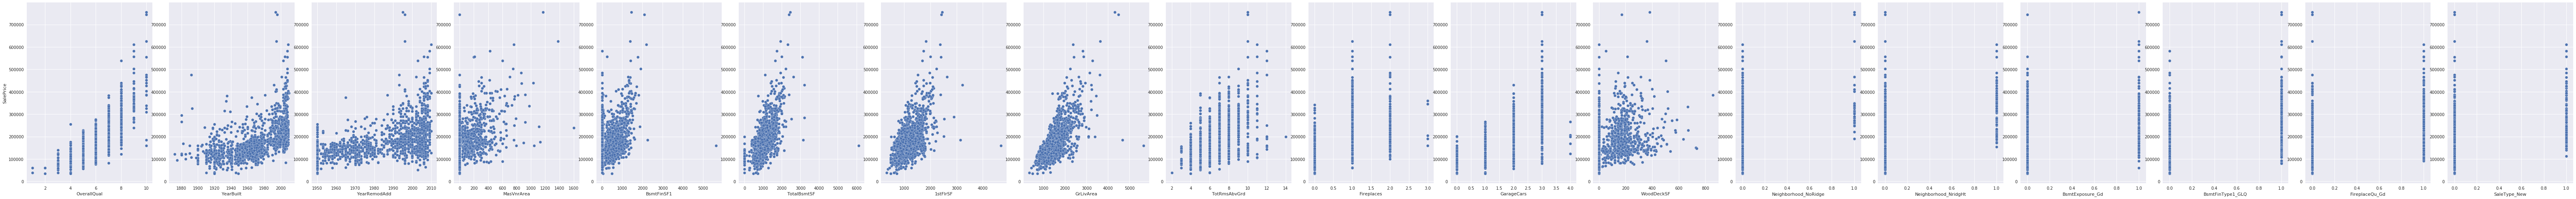

In [89]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(pd.concat(objs=[train, y], axis = 1), x_vars=columns, y_vars='SalePrice', size=7, aspect=0.7)